In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
np.random.seed(42)

n = 500

df = pd.DataFrame({
    "age": np.random.randint(18, 70, n),
    "income": np.random.randint(5, 50, n),          # triệu / tháng
    "loan_amount": np.random.randint(20, 500, n),   # triệu
})

# Biến mục tiêu: default (giả lập có logic)
df["default"] = (
    (df["income"] < 15) &
    (df["loan_amount"] > 200)
).astype(int)


In [5]:
df = pd.DataFrame(df)

In [6]:
df

,age,income,loan_amount,default
0,56,20,454,0
1,69,43,192,0
2,46,9,319,1
3,32,26,152,0
4,60,33,345,0
...,...,...,...,...
495,65,6,256,1
496,42,19,328,0
497,57,15,474,0
498,62,12,413,1


In [7]:
df["debt_income_ratio"] = df["loan_amount"] / df["income"]
df["young_customer"] = df["age"] < 30


In [9]:
summary = df.groupby("income_group").agg(
    customers=("default", "count"),
    avg_income=("income", "mean"),
    avg_loan=("loan_amount", "mean"),
    default_rate=("default", "mean")
).reset_index()

summary["default_rate"] = summary["default_rate"] * 100
summary


C:\Users\hi\AppData\Local\Temp\ipykernel_21508\1943011554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby("income_group").agg(


,income_group,customers,avg_income,avg_loan,default_rate
0,Low,136,10.595588,255.132353,47.794118
1,Mid-Low,119,22.042017,271.537815,0.000000
2,Mid-High,120,32.316667,261.575000,0.000000
3,High,125,43.032000,253.808000,0.000000


In [10]:
risk_matrix = pd.crosstab(
    df["age_group"],
    df["income_group"],
    values=df["default"],
    aggfunc="mean"
) * 100

risk_matrix


income_group,Low,Mid-Low,Mid-High,High
age_group,,,,
18-25,81.250000,0.0,0.0,0.0
26-35,50.000000,0.0,0.0,0.0
36-50,42.222222,0.0,0.0,0.0
50+,42.372881,0.0,0.0,0.0


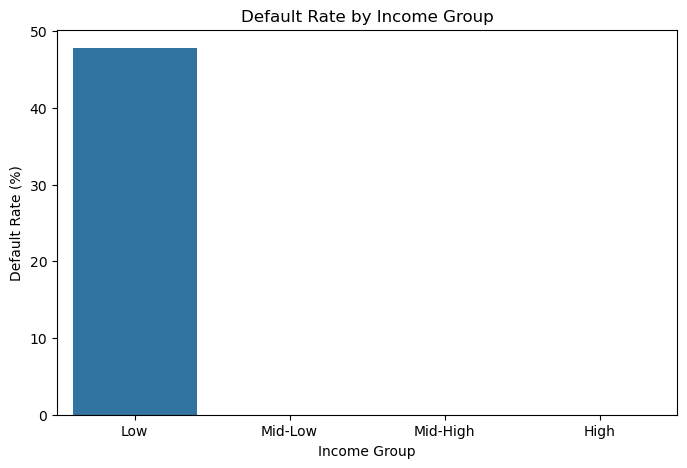

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="income_group",
    y="default_rate"
)
plt.ylabel("Default Rate (%)")
plt.xlabel("Income Group")
plt.title("Default Rate by Income Group")
plt.show()


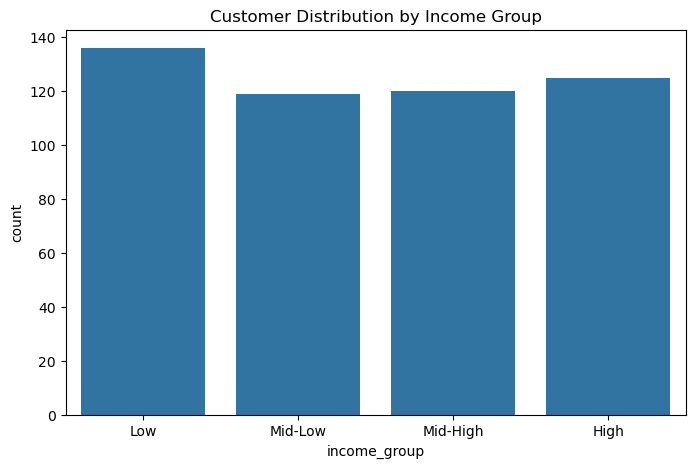

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="income_group"
)
plt.title("Customer Distribution by Income Group")
plt.show()


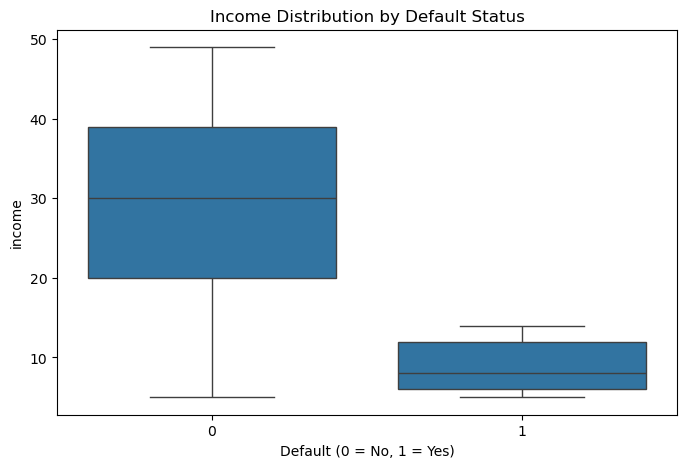

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="default",
    y="income"
)
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.title("Income Distribution by Default Status")
plt.show()


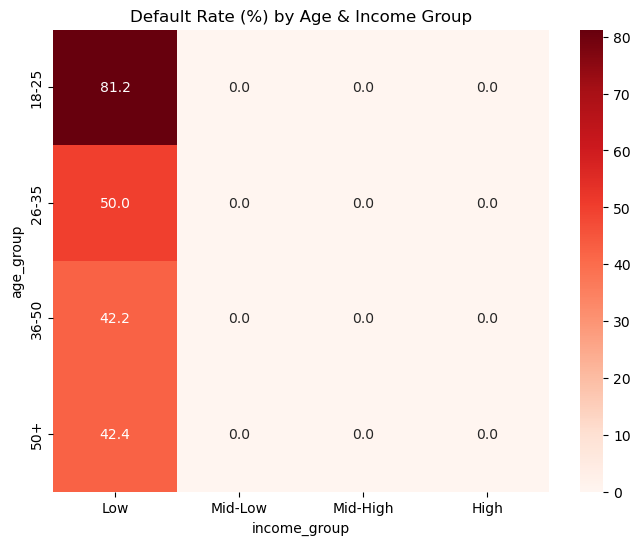

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    risk_matrix,
    annot=True,
    fmt=".1f",
    cmap="Reds"
)
plt.title("Default Rate (%) by Age & Income Group")
plt.show()
